# Workshop 12 - Sklearn

In today's workshop, we will apply what we learned in the lecture to the iris dataset, available through `sklearn` itself. It measures the length and width of the petals and sepals of 3 different types of iris flowers.

In this workshop, we will train both **regression** and **classification** models on this dataset, and we will also examine how **using more or less features** influences the **model performance**.

We begin by examining the dataset, followed by 4 exercises, in which you train 2 regression and 2 classification models:
- [Loading the dataset](#Loading-the-dataset)
- [Exercise 1](#Exercise-1)
- [Exercise 2](#Exercise-2)
- [Exercise 3](#Exercise-3)
- [Exercise 4](#Exercise-4)

## Loading the dataset

The following cell loads the dataset (into the variables `X` - sample features, `y` - sample classes, `features` - feature names, `targets` - class names).

It prints the `shape` of the dataset, confirming that we have 150 samples (corresponding to 150 flowers) with 4 measured features each.

Then, it displays the distribution between every pair of features, per class, as well as the distribution of each feature per class.

This plot can help you get intuition into the data we are working with.

(150, 4)


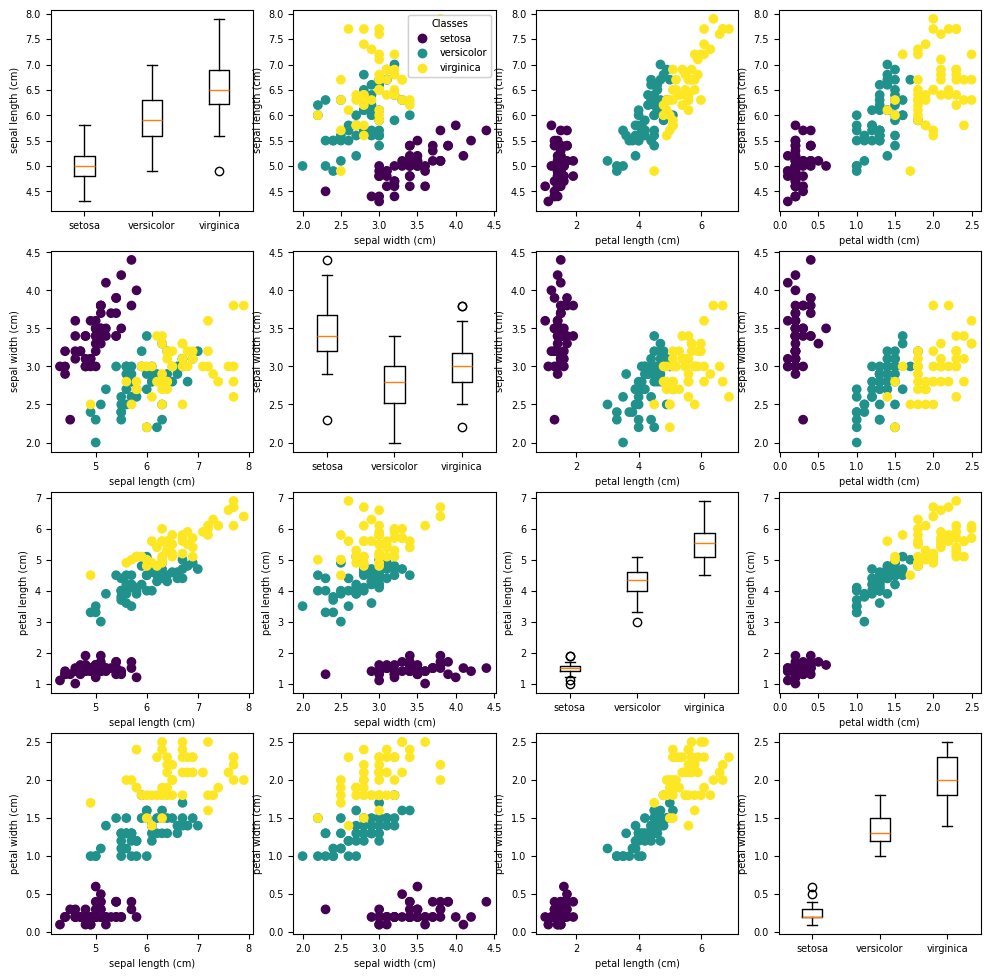

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 7})

data = datasets.load_iris()
X = data.data
print(X.shape)
y = data.target
features = data.feature_names
targets = data.target_names

fig, axs = plt.subplots(len(features), len(features), figsize = (12, 12))

for i, f1 in enumerate(features):
    for j, f2 in enumerate(features):
        if not i == j:
            sct = axs[i, j].scatter(X[:, j], X[:, i], c = y)
            axs[i, j].set_xlabel(f2)
            axs[i, j].set_ylabel(f1)
            if i==0 and j==1:
                scatter = sct
        else:
            categories = sorted(np.unique(y))
            grouped = [X[y==f, i] for f in categories]
            axs[i, j].boxplot(grouped, labels=categories, vert=True)

            axs[i,j].set_ylabel(f1)
            axs[i,j].set_xticks([1,2,3], targets)
            
legend = axs[0,1].legend(scatter.legend_elements()[0], targets,
                    loc="upper right", title="Classes")
axs[0,1].add_artist(legend)

plt.show()

## Exercise 1
### Training a regression model from a single feature

In the following task, you are expected to train a regression model predicting the value of `petal_width` from the values of `sepal_length`. You will be training a [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model.

you can do this in the following steps:
- select the first feature (`sepal_length` - column 0) into the variable `X_regression`. As each sample needs to be represented by an array, even if it has a single feature, you can apply `np.array.reshape(-1, 1)` to the selected feature
- select the feature to predict (`petal_width` - column 3) into the variable `y_regression`
- separate these into training and testing sets (`X_train, X_test, y_train, y_test`) using [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), using $20\%$ of the samples in the testing set
- initialise the [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model and fit it to the training data
- predict the values for the testing set and store it into `y_predicted`
- calculate the [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) metrics between `y_test` and `y_predicted`

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

X_regression = #...
y_regression = #...

X_train, X_test, y_train, y_test = # ...

model = # ...
# fit the model to the data:


# predict the feature on the test set:
y_predicted = # ...

# print r2 score and MAE:


0.7575009893273534
0.3312515284500666


For your convenience, if you have solved the above cell correctly (and used the specified names), the below cell should plot your training data and predicted function on the left; and on the right it should plot the predicted values for the points from the training set and their actual values.

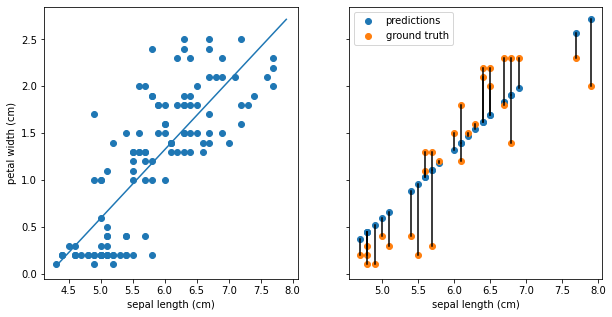

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5), sharey=True)
xmin = np.amin(X_regression)
xmax = np.amax(X_regression)
axs[0].scatter(X_train, y_train)
axs[0].set_xlabel(features[0])
axs[0].set_ylabel(features[3])

xs = np.linspace(xmin, xmax, 100).reshape(-1, 1)
ys = model.predict(xs)
axs[0].plot(xs, model.predict(xs))

axs[1].scatter(X_test, y_predicted, label = 'predictions')
axs[1].set_xlabel(features[0])

X_all = np.array([(v[0], v[1]) for v in np.vstack([X_test[:, 0], X_test[:, 0]]).transpose()], dtype='f,f')
Y_all = np.array([(v[0], v[1]) for v in np.vstack([y_predicted, y_test]).transpose()], dtype='f,f')
all_points = np.vstack([X_all, Y_all]).transpose().astype(object)

for points in all_points:
    axs[1].plot(*points, c='k')
axs[1].scatter(X_test, y_test, label = 'ground truth')
axs[1].legend()

plt.show()

## Exercise 2
### Training a regression model from all features

This exercise is similar to the previous one, except that you are expected to use all other features (`sepal_length`, `sepal_width` and `petal_length`) to predict `petal_width`.

You should perform the following steps:
- select the features(`sepal_length`, `sepal_width` and `petal_length` - columns 0, 1 and 2) into the variable `X_regression`
- select the feature to predict (`petal_width` - column 3) into the variable `y_regression`
- separate these into training and testing sets (`X_train, X_test, y_train, y_test`) using [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), using $20\%$ of the samples in the testing set
- initialise the [`linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model and fit it to the training data
- predict the values for the testing set and store it into `y_predicted`
- calculate the [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) metrics between `y_test` and `y_predicted`
- **Note** that all the steps but the first (selecting the features) are **exactly the same as in [Exercise 1](#Exercise-1)**. You can copy-paste the rest of your solution for [Exercise 1](#Exercise-1) once you select the features.

**Compare** the performance when all the features are used, to the performance in the previous exercise. Which setup results in a better performance?

0.9271105193357898
0.15905558437496842


Similarly to before, for your convenience, if you have solved the above cell correctly, the results are displayed visually below. The partial training data is shown for the `sepal_length` feature (however all 3 features are used to train this model), as well as the partial predictions on the testing data (also for the `sepal_length` feature).

You can see that the predictions no longer fall on a line in 2D (we are using 3 features to predict a 4th so it will be a 4D surface instead, which can not be visualised in 2D).

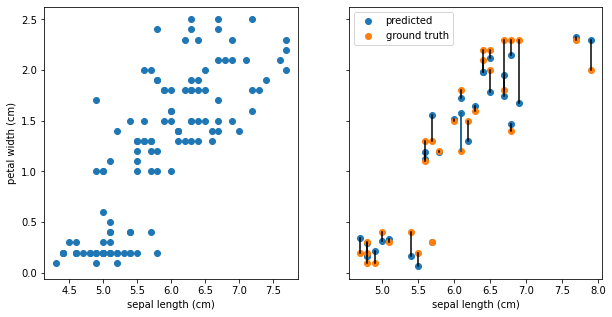

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5), sharey=True)
xmin = np.amin(X_regression)
xmax = np.amax(X_regression)
axs[0].scatter(X_train[:, 0], y_train)
axs[0].set_xlabel(features[0])
axs[0].set_ylabel(features[3])

axs[1].scatter(X_test[:, 0], y_predicted, label='predicted')
axs[1].set_xlabel(features[0])

start = np.array([(v[0], v[1]) for v in np.vstack([X_test[:, 0], X_test[:, 0]]).transpose()], dtype='f,f')
end = np.array([(v[0], v[1]) for v in np.vstack([y_predicted, y_test]).transpose()], dtype='f,f')
all_points = np.vstack([start, end]).transpose().astype(object)

for points in all_points:
    axs[1].plot(*points, c='k')
axs[1].plot(*all_points[0], *all_points[1])
axs[1].scatter(X_test[:, 0], y_test, label = 'ground truth')
axs[1].legend()

plt.show()

## Exercise 3
### Training a classification model from two features

In the following task, you are expected to train a **classification model** predicting the class of the iris flower from the values of `sepal_length` and `sepal_width`. You will be training a [`tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model.

You can do this in the following steps:
- select the first two features (`sepal_length` and `sepal_width` - column index 0 and 1) into the variable `X_classification`
- store the labels to predict in `y_classification` (this is currently just stored in `y`)
- separate these into training and testing sets (`X_train, X_test, y_train, y_test`) using [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), using $20\%$ of the samples in the testing set
- initialise the [`tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model with `max_depth=5` and fit it to the training data
- predict the values for the testing set and store it into `y_predicted`

The code will then evaluate your model, by calculating [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) metrics from your `y_test` and `y_predicted` classes.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

X_classification = # ..
y_classification = # ..

X_train, X_test, y_train, y_test = # ...

model = # ...
# fit the model to the data:

# predict the classes on the test set:
y_predicted = # ...


# Evaluation
print("accuracy on test set: {}".format(accuracy_score(y_test, y_predicted)))
print("f1-weighted on test set: {}".format(f1_score(y_test, y_predicted, average='weighted')))
print("Iris with features {} has predicted class {} (real {})".format(
    X_test[20], targets[y_predicted[20]], targets[y_test[20]]))


accuracy on test set: 0.7333333333333333
f1-weighted on test set: 0.7382775119617225
Iris with features [4.7 3.2] has predicted class setosa (real setosa)


Similarly to the previous two exercises, if you have trained the model correctly in the previous cell, the following one will visualise the results for your convenience.

It shows, on four axes (different classes shown in different colours):
- the training data
- the predicted values on the testing data
- the ground truth of the testing data
- the resulting confusion matrix

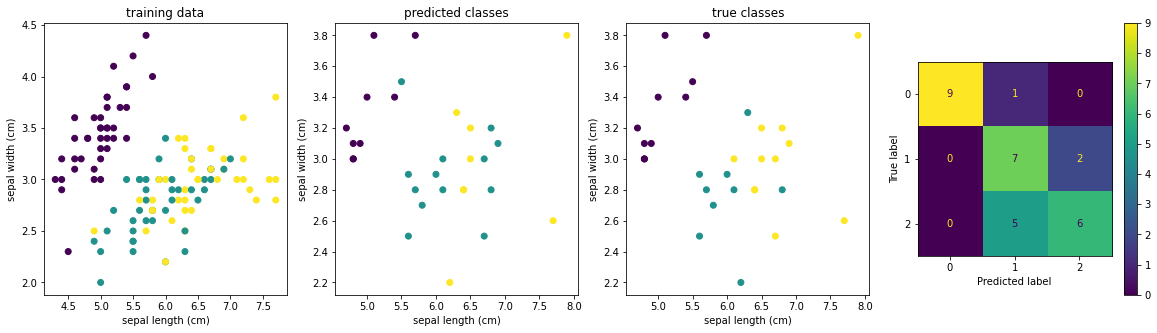

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 4, figsize = (20, 5))
xmin = np.amin(X_classification)
xmax = np.amax(X_classification)
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train)
axs[0].set_title('training data')
axs[0].set_xlabel(features[0])
axs[0].set_ylabel(features[1])

axs[1].scatter(X_test[: , 0], X_test[:, 1], c=y_predicted)
axs[1].set_title('predicted classes')
axs[1].set_xlabel(features[0])
axs[1].set_ylabel(features[1])

axs[2].scatter(X_test[: , 0], X_test[:, 1], c=y_test)
axs[2].set_title('true classes')
axs[2].set_xlabel(features[0])
axs[2].set_ylabel(features[1])

disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = axs[3])

plt.show()

## Exercise 4
### Training a regression model from all features

Instead of using just a subset of features, we will now **use all the features for classification** of iris flowers. 


You can do this in the following steps:
- store all the dataset features into the variable `X_classification` (these are currently just in `X`)
- store the labels to predict into `y_classification` (there are currently just in `y`)
- separate these into training and testing sets (`X_train, X_test, y_train, y_test`) using [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), using $20\%$ of the samples in the testing set
- initialise the [`tree.DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model with `max_depth=5` and fit it to the training data
- predict the values for the testing set and store it into `y_predicted`
- **Note** that _again_ all the steps but the first (selecting the features) are **exactly the same as in [Exercise 3](#Exercise-3)**. You can copy-paste the rest of your solution for [Exercise 3](#Exercise-3) once you select the features.

The code will then evaluate your model, by calculating [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) metrics from your `y_test` and `y_predicted` classes.

**Compare** the performance when all the features are used, to the performance in the previous exercise. Which setup results in a better performance?

In [8]:
###################################
#### Insert your solution here ####
###################################




# Evaluation:
print("accuracy on test set: {}".format(accuracy_score(y_test, y_predicted)))
print("f1-weighted on test set: {}".format(f1_score(y_test, y_predicted, average='weighted')))
print("Iris with features {} has predicted class {} (real {})".format(
    X_test[20], targets[y_predicted[20]], targets[y_test[20]]))

accuracy on test set: 1.0
f1-weighted on test set: 1.0
Iris with features [4.7 3.2 1.6 0.2] has predicted class setosa (real setosa)


Similarly to before, for your convenience, if you have solved the above cell correctly, the results are displayed visually below. The partial training data is shown for the `sepal_length` and `sepal_width` features (however all 4 features are used to train this model), as well as the partial on the partial testing data (also for the same two features), and a confusion matrix.

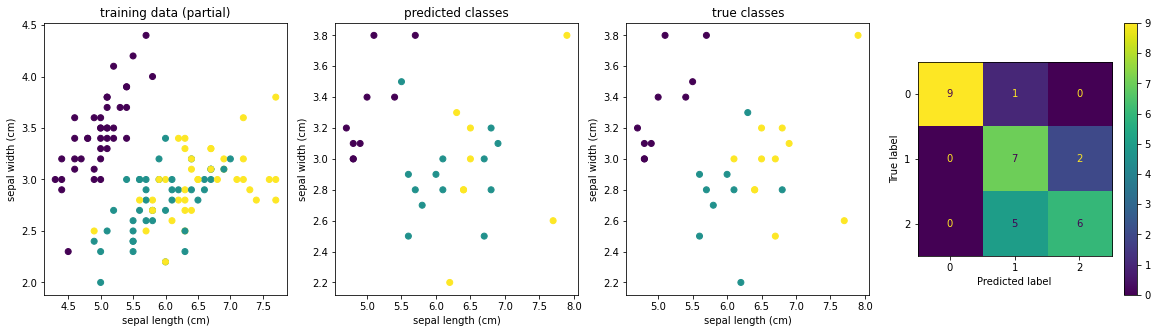

In [19]:
fig, axs = plt.subplots(1, 4, figsize = (20, 5))
xmin = np.amin(X_classification)
xmax = np.amax(X_classification)
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train)
axs[0].set_title('training data (partial)')
axs[0].set_xlabel(features[0])
axs[0].set_ylabel(features[1])

axs[1].scatter(X_test[: , 0], X_test[:, 1], c=y_predicted)
axs[1].set_title('predicted classes')
axs[1].set_xlabel(features[0])
axs[1].set_ylabel(features[1])

axs[2].scatter(X_test[: , 0], X_test[:, 1], c=y_test)
axs[2].set_title('true classes')
axs[2].set_xlabel(features[0])
axs[2].set_ylabel(features[1])

disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax = axs[3])

plt.show()